In [2]:
# dependencies for google colab
! pip install langchain_google_genai
! pip install python-dotenv
! pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [3]:
import requests
from PIL import Image
import torch
#importing models
from transformers import BlipProcessor, BlipForConditionalGeneration
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import re

from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate
import gradio as gr

from diffusers import DiffusionPipeline


In [4]:
load_dotenv()


True

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
Hugging_face_token=os.getenv('hugging_face_token')

In [7]:
! huggingface-cli login --token $Hugging_face_token


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `TristanPadiou` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `TristanPadiou`


In [3]:

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"

# processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )
# model.to(device)
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [8]:
# loading image captionning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device, torch.float16)


# loading stable diffusion
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = pipe.to(device, torch.float16)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# # loading stable diffusion
# pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium")
# pipe = pipe.to(device, torch.float16)


model_index.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:01<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/247M [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/740 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

(…)t_encoder_3/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

tokenizer_3/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_3/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_3/tokenizer_config.json:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/524 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/809 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [133]:
img_url = 'https://novakdjokovicfoundation.org/wp-content/uploads/2015/02/ocean-drawing.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

In [134]:
# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

# out = model.generate(**inputs).
# print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

out = model.generate(**inputs, min_length=20)
print(processor.decode(out[0], skip_special_tokens=True))

there are a lot of jellyfishs and fish in the ocean and a seal fish is swimming


In [135]:
model_prompt=processor.decode(out[0], skip_special_tokens=True)

In [136]:
model_prompt

'there are a lot of jellyfishs and fish in the ocean and a seal fish is swimming'

In [137]:


# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"

# Store the API key in a variable.
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [138]:
llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

In [139]:
requirement = input("Please input your requirement for the story: ")

Please input your requirement for the story: for a 8 years old child, exciting


In [140]:
query =f' Write a short story based on the content of {model_prompt} and that fits the following requirements: {requirement}. give a detailed description of the charaters appearences '

In [141]:
result = llm.invoke(query)
print(result.content)

Finley the seal pup was a fluffy torpedo of brown fur, with big, soulful brown eyes that looked perpetually surprised.  His whiskers, long and sensitive, twitched constantly as he explored the underwater world.  He was still quite small, only about the size of a beach ball, with clumsy flippers that sometimes got him into a bit of a muddle.

Today, the ocean was a dazzling kaleidoscope!  Thousands of jellyfish pulsed through the water, their bell-shaped bodies shimmering like opalescent balloons.  Some were tiny, like miniature parachutes, while others were enormous, their tentacles trailing like long, shimmering ribbons.  Finley loved watching them, but he knew better than to touch them – their stings were famously unpleasant!

Between the jellyfish swam a dazzling array of fish.  Bright orange clownfish darted in and out of anemones, their bodies striped like tiny circus performers.  Schools of silvery sardines shimmered like a living river, their scales catching the sunlight in a da

In [142]:
story= result.content.replace('\n',' ')
story

"Finley the seal pup was a fluffy torpedo of brown fur, with big, soulful brown eyes that looked perpetually surprised.  His whiskers, long and sensitive, twitched constantly as he explored the underwater world.  He was still quite small, only about the size of a beach ball, with clumsy flippers that sometimes got him into a bit of a muddle.  Today, the ocean was a dazzling kaleidoscope!  Thousands of jellyfish pulsed through the water, their bell-shaped bodies shimmering like opalescent balloons.  Some were tiny, like miniature parachutes, while others were enormous, their tentacles trailing like long, shimmering ribbons.  Finley loved watching them, but he knew better than to touch them – their stings were famously unpleasant!  Between the jellyfish swam a dazzling array of fish.  Bright orange clownfish darted in and out of anemones, their bodies striped like tiny circus performers.  Schools of silvery sardines shimmered like a living river, their scales catching the sunlight in a d

In [81]:
# character_extraction_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)
# schemas=[
#     ResponseSchema(name='character 1', description='character description'),
#     ResponseSchema(name='character 2', description='character description'),
#     ResponseSchema(name='character 3', description='character description')

# ]
# character_parser=StructuredOutputParser.from_response_schemas(schemas)
# instructions=character_parser.get_format_instructions()

In [86]:
# query = f' list the appearance of 3 characters of this {story}'+ '\n\n'+instructions

In [87]:
# result_characters=character_extraction_llm.invoke(query)

In [88]:
# result_characters.content

'```json\n{\n  "character 1": "Sunny: A brave but scared unicorn with a silver horn, small in size.",\n  "character 2": "The Red Sun: A huge, blood-red sun with a creepy appearance, emitting a low growl like grinding rocks.",\n  "character 3": "Shadow-Claw: A shadowy claw, long and sharp like a dragon\'s tooth, emerging from a crack in the rainbow."\n}\n```\n'

In [89]:
# characters=character_parser.parse(result_characters.content)
# characters

{'character 1': 'Sunny: A brave but scared unicorn with a silver horn, small in size.',
 'character 2': 'The Red Sun: A huge, blood-red sun with a creepy appearance, emitting a low growl like grinding rocks.',
 'character 3': "Shadow-Claw: A shadowy claw, long and sharp like a dragon's tooth, emerging from a crack in the rainbow."}

In [143]:
image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

schemas=[
    ResponseSchema(name='prompt 1', description='the prompt'),
    ResponseSchema(name='prompt 2', description='the prompt'),
    ResponseSchema(name='prompt 3', description='the prompt'),
    ResponseSchema(name='prompt 4', description='the prompt')
]

parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [175]:
query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
 the story in a linear fashion with a consistant drawing style. Make sure to describe the characters everytime\
  The prompts have to be a minimum of 70 and a maximum of 77 tokens long each'+ '\n\n'+instructions




In [176]:
result=image_prompt_llm.invoke(query)
result

AIMessage(content='```json\n{\n  "prompt 1": "A fluffy brown seal pup, Finley, with big surprised brown eyes and twitching whiskers, explores a vibrant underwater scene filled with jellyfish of varying sizes, shimmering like opalescent balloons;  Finley is about the size of a beach ball, with clumsy flippers.  Detailed, whimsical, cartoon style.",\n  "prompt 2": "Finley the seal pup, a fluffy brown torpedo with large, surprised eyes, swims amongst bright orange clownfish darting in and out of anemones, schools of silvery sardines, and a grumpy, spiky pufferfish that puffs up when Finley approaches;  Finley is small and clumsy, the scene is vibrant and detailed in a whimsical cartoon style.",\n  "prompt 3": "Finley, the small brown seal pup with perpetually surprised eyes, chases a giant school of rainbow fish, their scales flashing every color;  He narrowly avoids large jellyfish and bumps into the grumpy pufferfish, who puffs up even larger, causing Finley to bump into more jellyfish.

In [177]:
image_prompts = parser.parse(result.content)

In [178]:
image_prompts

{'prompt 1': 'A fluffy brown seal pup, Finley, with big surprised brown eyes and twitching whiskers, explores a vibrant underwater scene filled with jellyfish of varying sizes, shimmering like opalescent balloons;  Finley is about the size of a beach ball, with clumsy flippers.  Detailed, whimsical, cartoon style.',
 'prompt 2': 'Finley the seal pup, a fluffy brown torpedo with large, surprised eyes, swims amongst bright orange clownfish darting in and out of anemones, schools of silvery sardines, and a grumpy, spiky pufferfish that puffs up when Finley approaches;  Finley is small and clumsy, the scene is vibrant and detailed in a whimsical cartoon style.',
 'prompt 3': 'Finley, the small brown seal pup with perpetually surprised eyes, chases a giant school of rainbow fish, their scales flashing every color;  He narrowly avoids large jellyfish and bumps into the grumpy pufferfish, who puffs up even larger, causing Finley to bump into more jellyfish. Whimsical cartoon style, detailed u

In [179]:
# prompt = result["text"]
images=[]
for i in image_prompts.keys():

  image = pipe(image_prompts[i]).images[0]
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

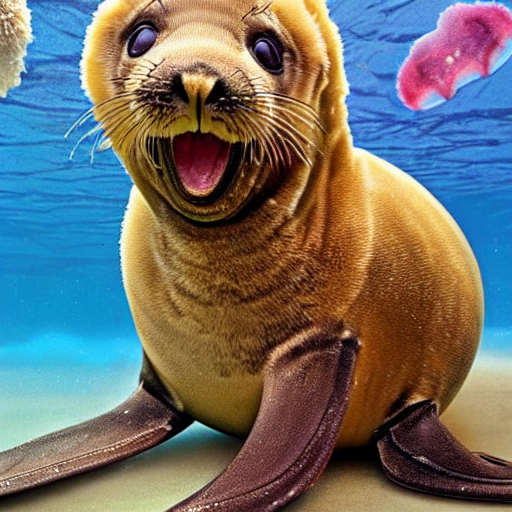

In [180]:
images[0]

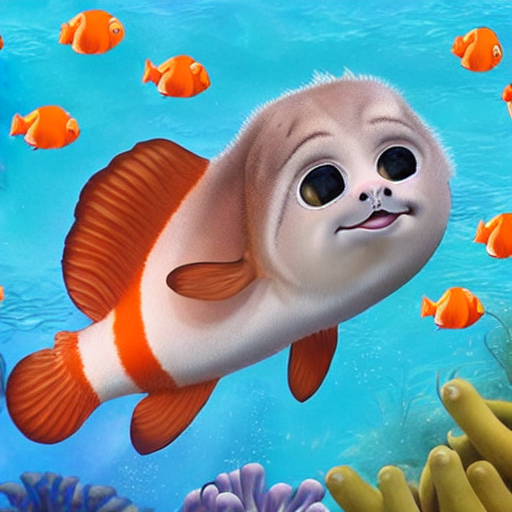

In [181]:
images[1]

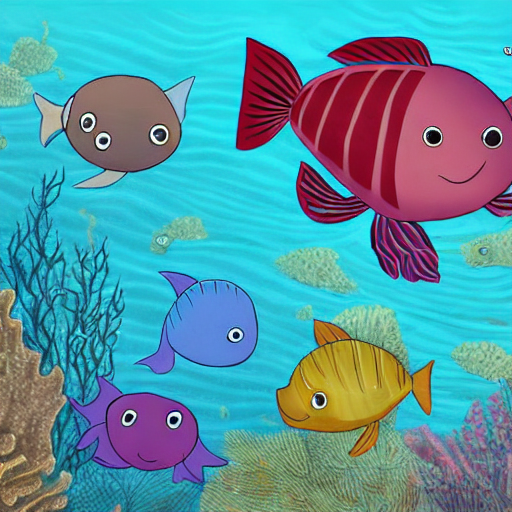

In [182]:
images[2]

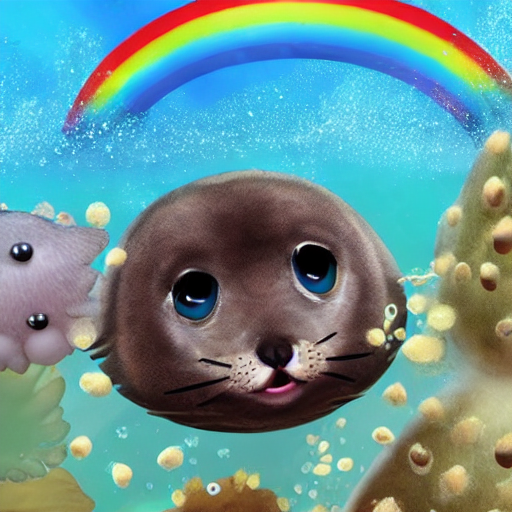

In [183]:
images[3]

In [ ]:
def story_generator(raw_image):
  inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

  out = model.generate(**inputs, min_length=20)
  model_prompt=processor.decode(out[0], skip_special_tokens=True)

  llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)
  requirement = input("Please input your requirement for the story: ")
  query =f' Write a short story based on the content of {model_prompt} and \
  that fits the following requirements: {requirement}. give a detailed \
  description of the charaters appearences '

  result = llm.invoke(query)
  story= result.content.replace('\n',' ')

  return story




In [ ]:
def image_generation(story):
  image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

  schemas=[
      ResponseSchema(name='prompt 1', description='the prompt'),
      ResponseSchema(name='prompt 2', description='the prompt'),
      ResponseSchema(name='prompt 3', description='the prompt'),
      ResponseSchema(name='prompt 4', description='the prompt')
  ]

  parser=StructuredOutputParser.from_response_schemas(schemas)
  instructions=parser.get_format_instructions()

  query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
 the story in a linear fashion with a consistant drawing style. Make sure to describe the characters everytime\
  The prompts have to be a minimum of 70 and a maximum of 77 tokens long each'+ '\n\n'+instructions

  result=image_prompt_llm.invoke(query)
  image_prompts = parser.parse(result.content)

  images=[]
  for i in image_prompts.keys():

    image = pipe(image_prompts[i]).images[0]
    images.append(image)

  return images


In [9]:
# gradio
interface = gr.Interface(
    fn=process_image,
    inputs=gr.Image(type=“filepath”),
    outputs=“image”,
    title=“Image Uploader”,
    description=“Upload an image to start the story generation process.”
)
if __name__ == “__main__“:
    interface.launch()

SyntaxError: invalid character '“' (U+201C) (<ipython-input-9-65bb06d61597>, line 4)